In [160]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [161]:
data = pd.read_csv('C:/Users/vidoo/OneDrive/Desktop/Codes_and_resources/Projects/mnist/digit-recognizer/train.csv')

In [162]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev/255

data_train = data[1000: m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train/255


In [164]:
def init_var():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2


In [165]:
def ReLU(z):
    return np.maximum(z, 0)

def Softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def derv_ReLU(z):
    return z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [166]:
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = Softmax(z2)
    return z1, a1, z2, a2

def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    # one_hot_y = pd.get_dummies(y).T
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * (dz2.dot(a1.T))
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * derv_ReLU(z1)
    dw1 = 1 / m * (dz1.dot(x.T))
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_var(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [167]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def accuracy(pred, y):
    return np.sum(pred == y)/y.size

def grad_descent(x, y, itr, alpha):
    w1, b1, w2, b2 = init_var()
    for i in range(itr):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_var(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", accuracy(get_predictions(a2), y))
    return w1, b1, w2, b2


In [175]:
w1, b1, w2, b2 = grad_descent(x_train, y_train, 500, 0.1)

Iteration:  0
Accuracy:  0.13526829268292684
Iteration:  10
Accuracy:  0.22092682926829268
Iteration:  20
Accuracy:  0.2614146341463415
Iteration:  30
Accuracy:  0.343219512195122
Iteration:  40
Accuracy:  0.3847317073170732
Iteration:  50
Accuracy:  0.4209512195121951
Iteration:  60
Accuracy:  0.4601219512195122
Iteration:  70
Accuracy:  0.49309756097560975
Iteration:  80
Accuracy:  0.5226585365853659
Iteration:  90
Accuracy:  0.5466829268292683
Iteration:  100
Accuracy:  0.5639512195121951
Iteration:  110
Accuracy:  0.5796097560975609
Iteration:  120
Accuracy:  0.5916585365853658
Iteration:  130
Accuracy:  0.6035853658536585
Iteration:  140
Accuracy:  0.6176829268292683
Iteration:  150
Accuracy:  0.6387560975609756
Iteration:  160
Accuracy:  0.6591707317073171
Iteration:  170
Accuracy:  0.680439024390244
Iteration:  180
Accuracy:  0.6983170731707317
Iteration:  190
Accuracy:  0.7152439024390244
Iteration:  200
Accuracy:  0.7282195121951219
Iteration:  210
Accuracy:  0.739219512195121

In [172]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


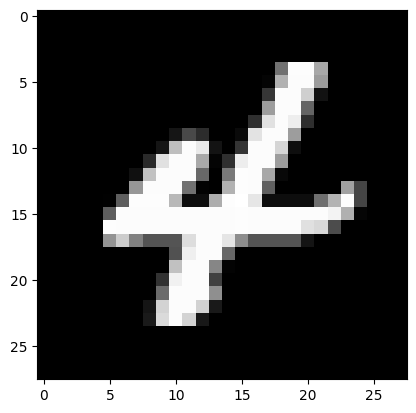

Prediction:  [1]
Label:  8


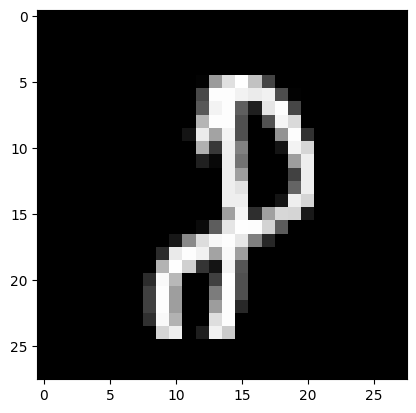

Prediction:  [9]
Label:  5


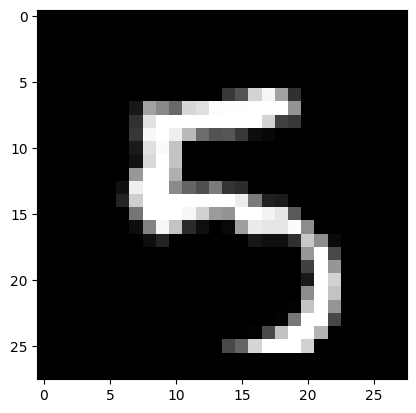

Prediction:  [0]
Label:  0


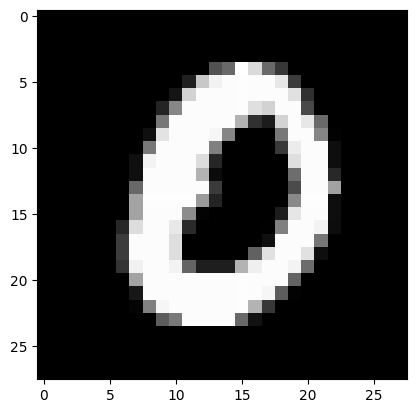

Prediction:  [5]
Label:  5


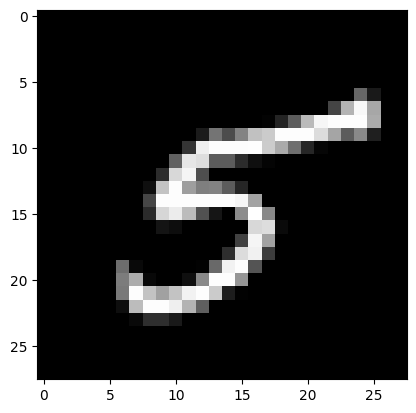

Prediction:  [9]
Label:  9


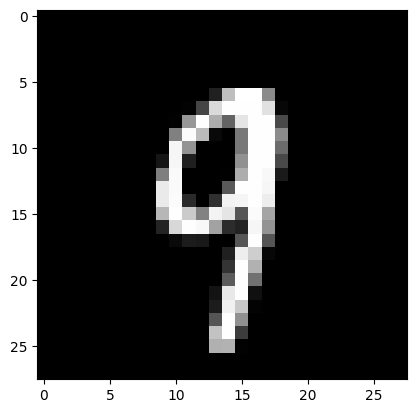

Prediction:  [6]
Label:  6


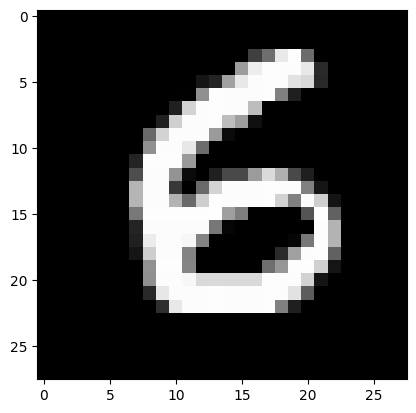

Prediction:  [1]
Label:  1


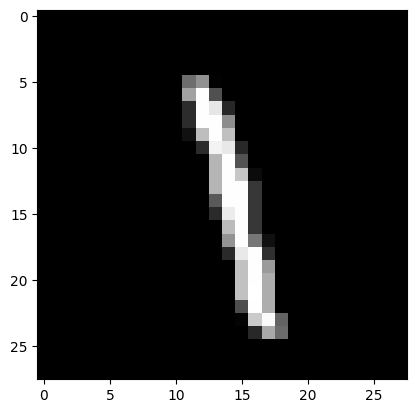

Prediction:  [2]
Label:  2


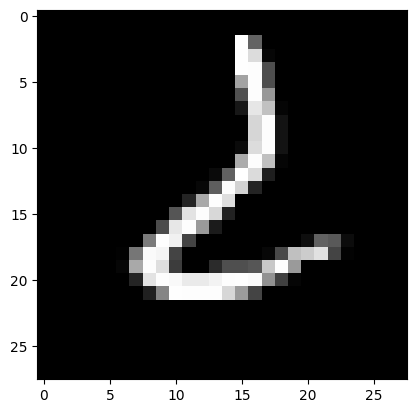

Prediction:  [5]
Label:  5


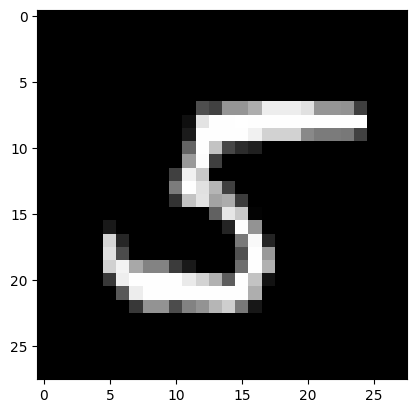

Prediction:  [6]
Label:  4


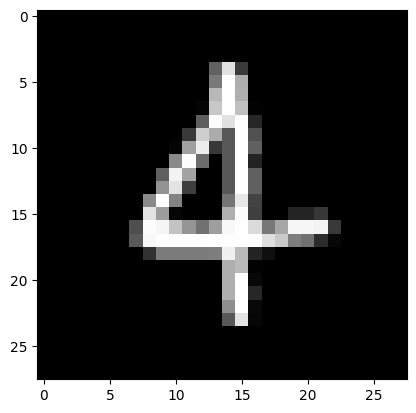

Prediction:  [8]
Label:  8


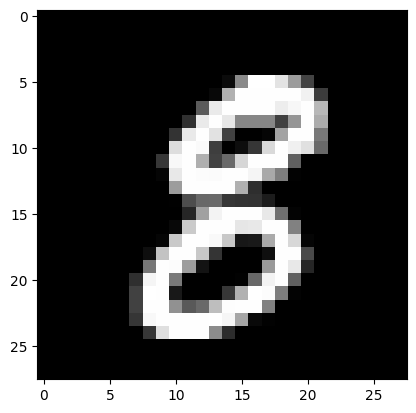

Prediction:  [3]
Label:  3


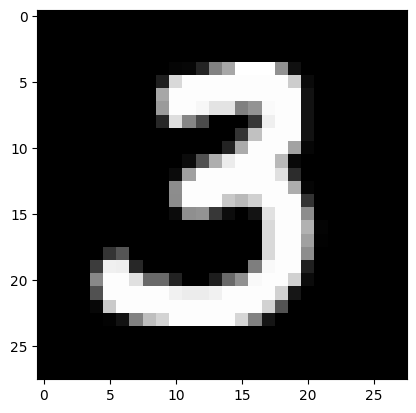

Prediction:  [0]
Label:  0


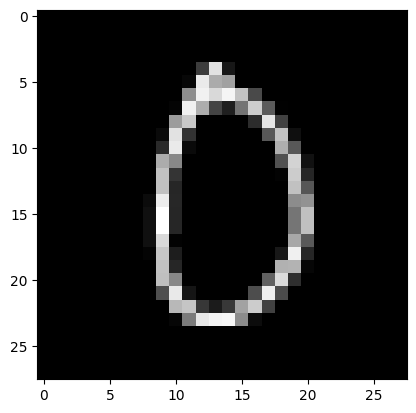

Prediction:  [8]
Label:  8


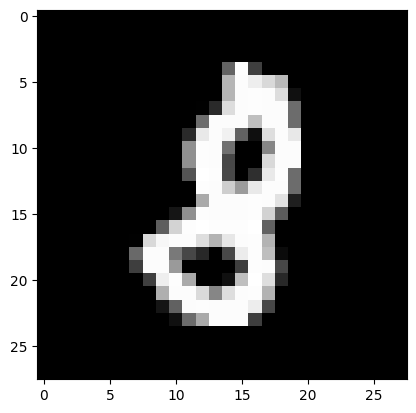

Prediction:  [4]
Label:  4


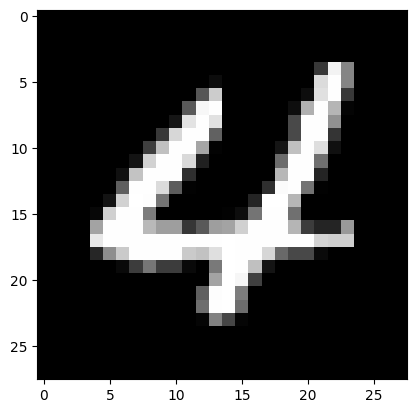

Prediction:  [2]
Label:  2


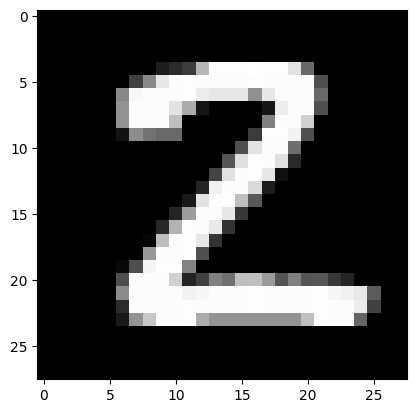

Prediction:  [1]
Label:  1


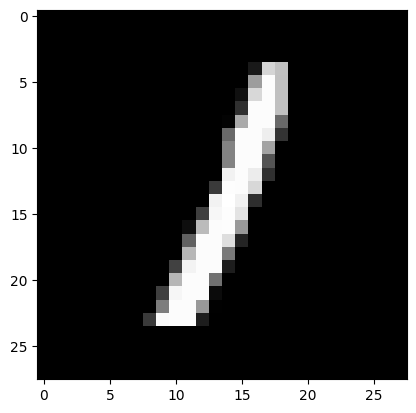

Prediction:  [1]
Label:  1


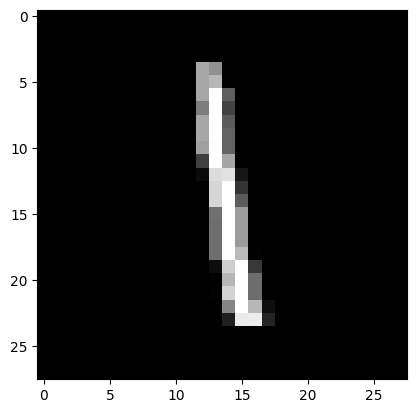

Prediction:  [3]
Label:  3


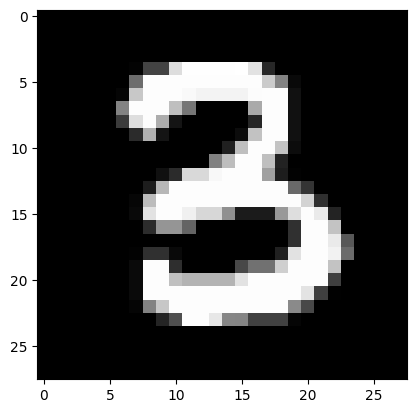

In [176]:
for i in range(20):
    test_prediction(i, w1, b1, w2, b2)